In [31]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import lane_detection
import lane_following

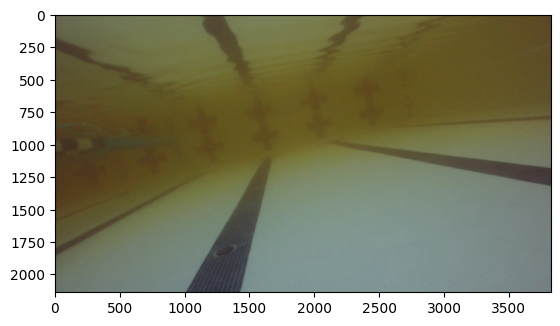

In [32]:
img = cv2.imread('lanes.png')
type(img)
img.shape
resized = (cv2.resize(img, (1912, 1069)))
height = resized.shape[0]
width = resized.shape[1]
againResized = resized[int(height/2) : height, 0 : width]
justincase = np.copy(againResized)
image = np.copy(resized)
imageLanes = np.copy(resized)
plt.imshow(img)



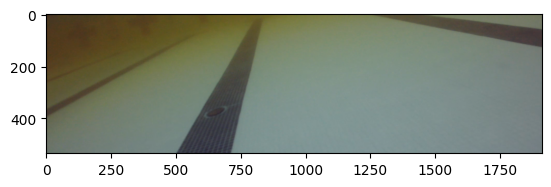

In [33]:
plt.imshow(againResized)

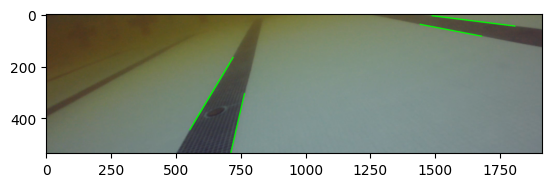

In [34]:
lines = lane_detection.detect_lines(againResized, 30, 100, 3, 229, 13)
plt.imshow(lane_detection.draw_lines(againResized, lines))

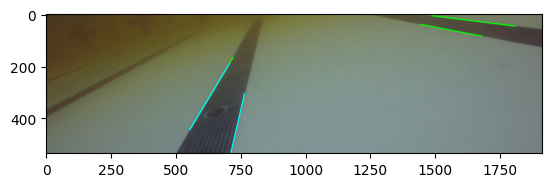

In [35]:
lanes = lane_detection.detect_lanes(againResized, lines)
plt.imshow(lane_detection.draw_lanes(againResized, lanes))

In [36]:
print(f"Possible lines: {lines}")
print(f"Possible lanes: {lanes}")
print(f"Line slopes and intercepts: {lane_detection.get_slopes_intercepts(againResized, lines)}")

Possible lines: [[1487, 6, 1808, 46], [554, 445, 707, 190], [1441, 39, 1680, 85], [570, 417, 721, 166], [712, 534, 765, 305]]
Possible lanes: [[[554, 445, 707, 190], [712, 534, 765, 305]]]
Line slopes and intercepts: ([0.12461059190031153, -1.6666666666666667, 0.19246861924686193, -1.6622516556291391, -4.320754716981132], [5732.225, 500.0, 4018.0434782608695, 499.0119521912351, 711.768558951965])


In [37]:
center = lane_following.get_lane_center(img, lanes)
action = lane_following.recommend_direction(img, center[0], center[1])
print(f"Center slope and intercept: {center}") # [-2.9955124936257014, 606.2985189581832]
print(f"Recommended action: {action}")

Center slope and intercept: [-2.4054621848739495, -60.51572052401744]
Recommended action: ['strafe left']


In [38]:
# code for video following
def videoDrawing(vid):
        # Capture frame-by-frame
    ret, frame = vid.read()
    if ret is not None:
        resized = (cv2.resize(frame, (1912, 1069)))
        h = resized.shape[0]
        w = resized.shape[1]
        againResized = resized[int(h/2) : h, 0 : w]
    
        lines = lane_detection.detect_lines(againResized, 30, 100, 3, 229, 13)
        if lines is not None:
            lanes = lane_detection.detect_lanes(againResized, lines)
        else:
            lanes = []
        return lane_detection.draw_lanes(againResized, lanes)


In [39]:
vid = cv2.VideoCapture('AUV_Vid.mkv')


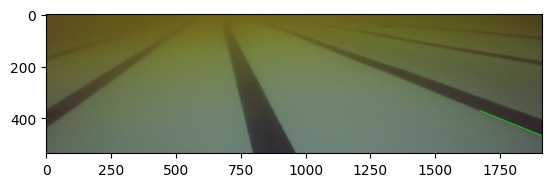

In [54]:
plt.imshow(videoDrawing(vid))

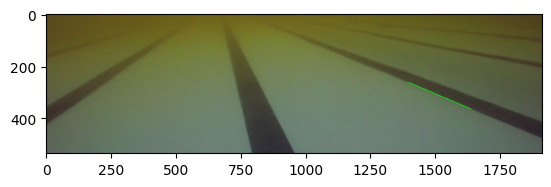

In [41]:
vid = cv2.VideoCapture('AUV_Vid.mkv')
plt.imshow(videoDrawing(vid))

In [42]:
# # code for video following
# def videoDrawing(vid):
#     laneArray = []
#     output_file = 'output_video.avi'
#     fourcc = cv2.VideoWriter_fourcc(*'XVID')
#     output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

#         # Capture frame-by-frame
#     i = 1
#     while True:
#         ret, frame = vid.read()
#         if ret is not None:

#             resized = (cv2.resize(frame, (1912, 1069)))
#             h = resized.shape[0]
#             w = resized.shape[1]
#             againResized = resized[int(h/2) : h, 0 : w]
        
#             lines = lane_detection.detect_lines(againResized, 30, 100, 3, 229, 13)
#             if lines is not None:
#                 lanes = lane_detection.detect_lanes(againResized, lines)
#             else:
#                 lanes = []
#             output_video.write(lane_detection.draw_lanes(againResized, lanes))
#         i+=1
#         if i >= 100: break

#     output_video.release()
#     return output_video

In [43]:
# vid = cv2.VideoCapture('AUV_Vid.mkv')
# videoDrawing(vid)